

<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>



## When More Isn’t Better: Unmasking the Curse of Dimensionality

### Manav Patel
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering

### Subsurface Machine Learning Course, The University of Texas at Austin
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering
#### Department of Geological Sciences, Jackson School of Geosciences

_____________________

Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The Univeristy of Texas at Austin
[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Elnara Rustamzade, Graduate Student, The University of Texas at Austin
##### [LinkedIn](https://www.linkedin.com/in/elnara-rustamzade/)


### Executive Summary

* ##### This study investigates the curse of dimensionality through a series of visual, statistical, and computational experiments using synthetic data and the scikit-learn Digits dataset. The curse refers to the complex and often unintuitive behaviors that emerge as the number of dimensions in a dataset increases affecting everything from distance metrics to data visualization and algorithm performance.

#### Key Areas covered in this notebook:
* ##### Distance Concentration: As dimensions increase, pairwise distances between random points become nearly uniform. This leads to a loss of contrast between "near" and "far" neighbors, weakening the core assumption of many machine learning algorithms.

* ##### Geometric Intuition Breaks Down: The volume of a unit hypersphere diminishes relative to the hypercube in high dimensions. Most data points lie near the boundary, and the number of meaningful neighbors drastically decreases.

* ##### PCA & Variance Distribution: Principal Component Analysis (PCA) reveals that as dimensionality increases, variance spreads across more components. The first two components capture significantly less variance, making 2D projections less informative and emphasizing the need for higher-dimensional embedding or more sophisticated reduction techniques.

* ##### Visualization Limitations: Intuitive visualizations are possible in 1D–3D, somewhat feasible with 4D–5D using color and size cues, but become virtually impossible beyond that. Patterns become obscured, and human interpretation fails without dimensionality reduction.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from scipy.special import gamma
from scipy.spatial.distance import cdist
from ipywidgets import interact
import plotly.graph_objects as go

### Visualizing Data in 1D, 2D, and 3D
The following plots demonstrate how data can be visualized in increasing dimensions:

* 1D (Line Plot): A simple line plot is used to represent a single feature or value across different indices. This is straightforward and commonly used for time series or sequential data.

* 2D (Scatter Plot): A 2D scatter plot allows us to visualize the relationship between two features (X and Y). This is one of the most intuitive and widely used visualizations for pattern recognition and clustering.

* 3D (3D Scatter Plot): A 3D scatter plot helps visualize relationships among three variables. Although not as commonly used due to complexity, it still allows spatial understanding of clusters, groupings, or distributions in three dimensions.



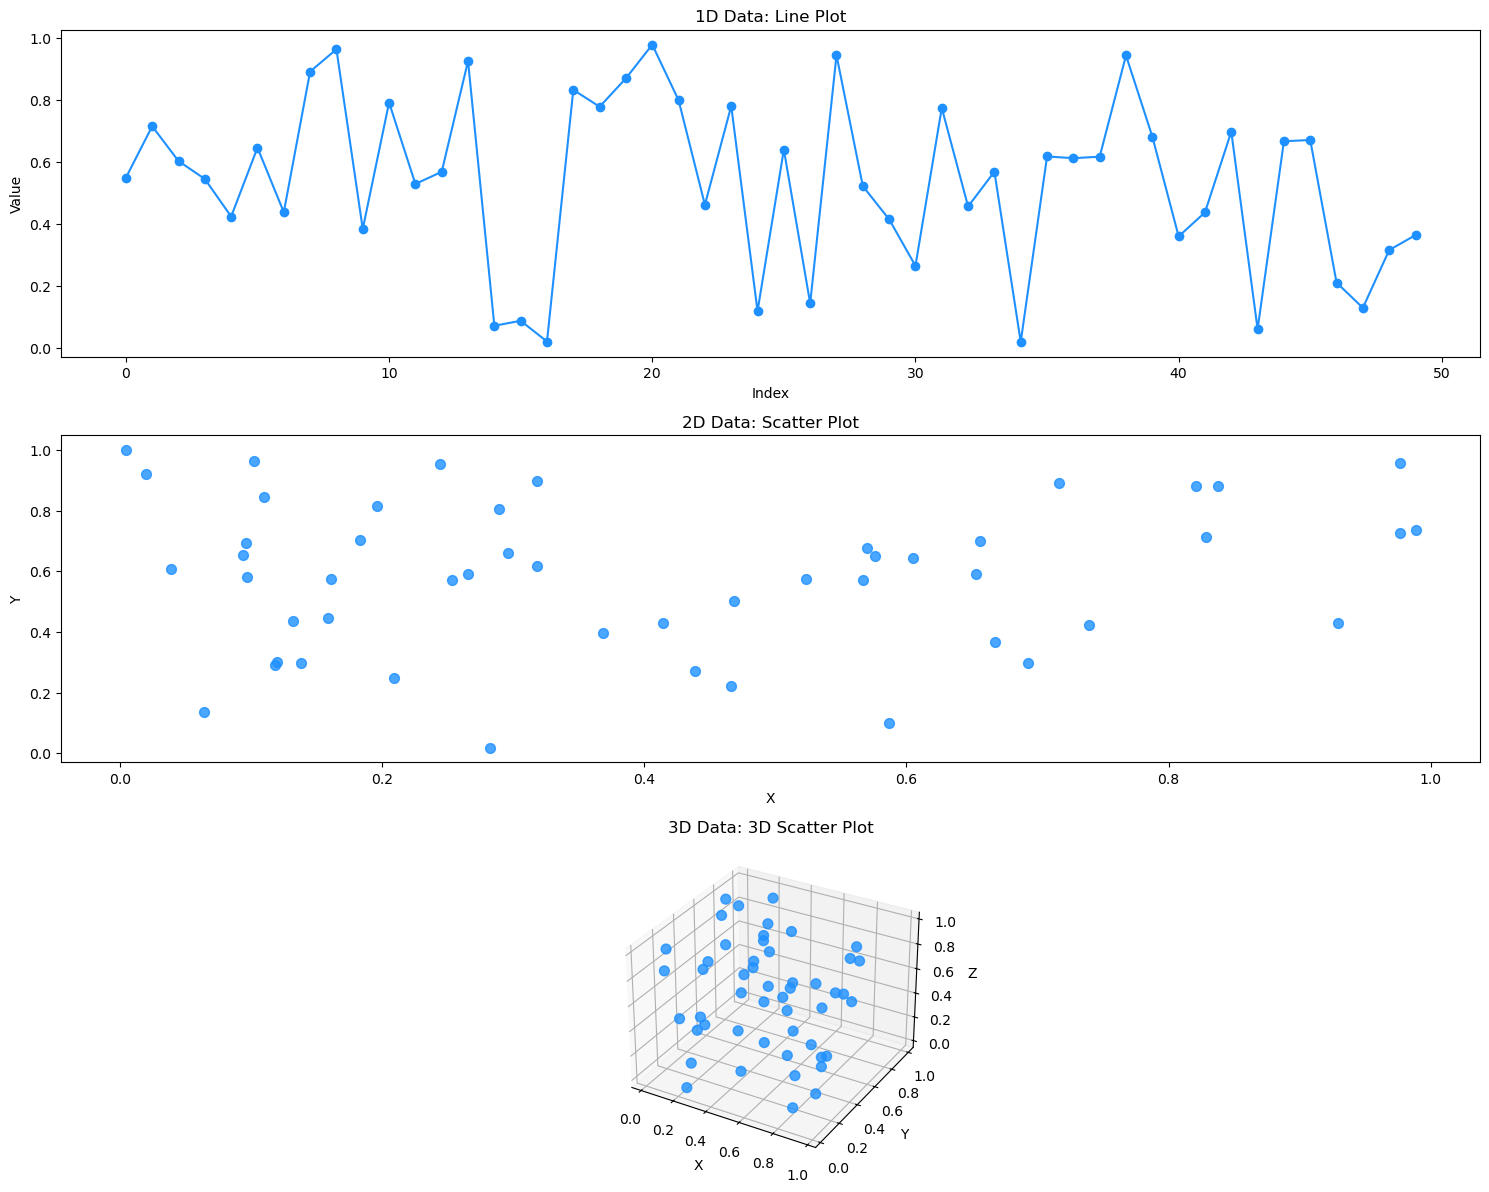

In [2]:
np.random.seed(0)
n = 50  # Number of data points

fig = plt.figure(figsize=(15, 20))

# 1D: Line Plot
ax1 = fig.add_subplot(5, 1, 1)
x1 = np.arange(n)
y1 = np.random.rand(n)
ax1.plot(x1, y1, 'o-', color='dodgerblue', markersize=6)
ax1.set_title("1D Data: Line Plot")
ax1.set_xlabel("Index")
ax1.set_ylabel("Value")

# 2D: Scatter Plot
ax2 = fig.add_subplot(5, 1, 2)
x2 = np.random.rand(n)
y2 = np.random.rand(n)
ax2.scatter(x2, y2, color='dodgerblue', s=50, alpha=0.8)
ax2.set_title("2D Data: Scatter Plot")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")

# 3D: 3D Scatter Plot
ax3 = fig.add_subplot(5, 1, 3, projection='3d')
x3 = np.random.rand(n)
y3 = np.random.rand(n)
z3 = np.random.rand(n)
ax3.scatter(x3, y3, z3, color='dodgerblue', s=50, alpha=0.8)
ax3.set_title("3D Data: 3D Scatter Plot")
ax3.set_xlabel("X")
ax3.set_ylabel("Y")
ax3.set_zlabel("Z")

plt.tight_layout()
plt.show()


### Visualizing Data in 4D
In this visualization, I extend beyond the traditional 3D plot by introducing a fourth dimension through color intensity:
* X, Y, Z Axes: Represent the first three spatial dimensions, plotted as a 3D scatter plot.
* Color Gradient (4th Dimension): The fourth dimension is encoded using a color scale (Plasma), where each point’s color corresponds to the value of a mathematical function (in this case, cos(x + y + z)).

In [3]:
x4, y4, z4 = np.random.rand(3, 100)
values4 = np.cos(x4 + y4 + z4)  # 4th-dimension values

fig4 = go.Figure(data=[go.Scatter3d(
    x=x4, y=y4, z=z4,
    mode='markers',
    marker=dict(
        size=8,
        color=values4,
        colorscale='Plasma',
        opacity=0.8,
        colorbar=dict(title='Value')
    )
)])

fig4.update_layout(
    scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'),
    title='Interactive 4D Plot',
    width=800,
    height=600
)
fig4.show()


### Visualizing Data in 5D
In this plot, I push the limits of human perception by encoding five dimensions of data into a single visualization:

* X, Y, Z Axes: Represent the first three spatial dimensions in a 3D scatter plot.

* Color (4th Dimension): The color of each point corresponds to a separate variable, visualized using the 'magma' colormap.

* Size (5th Dimension): The size of each marker represents a fifth dimension, varying from small to large.

As I move into five-dimensional space, the complexity of interpreting visual data increases dramatically. Even though I can map the 4th and 5th dimensions using visual cues like color and size, our ability to understand relationships, clusters, or patterns across these dimensions becomes extremely limited. This example emphasizes how high-dimensional data cannot be effectively visualized through traditional plots and highlights the importance of dimensionality reduction and mathematical abstraction when working with real-world high-dimensional datasets.

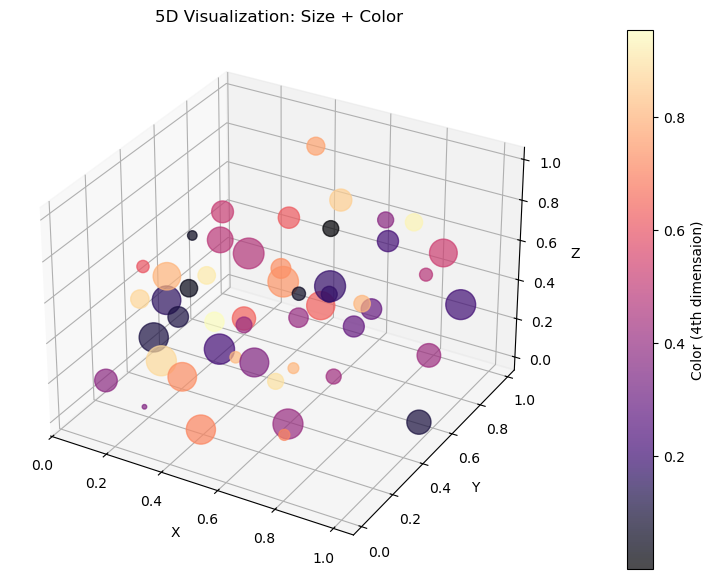

In [4]:
x5, y5, z5 = np.random.rand(3, 50)
sizes5 = np.random.uniform(10, 500, 50)  # 5th dimension: point size
colors5 = np.random.rand(50)              # 4th dimension: color

fig5 = plt.figure(figsize=(10, 7))
ax5 = fig5.add_subplot(111, projection='3d')
scatter = ax5.scatter(x5, y5, z5, s=sizes5, c=colors5, cmap='magma', alpha=0.7)
fig5.colorbar(scatter, label='Color (4th dimensaion)', pad=0.1)
ax5.set_xlabel('X')
ax5.set_ylabel('Y')
ax5.set_zlabel('Z')
ax5.set_title("5D Visualization: Size + Color")
plt.show()


### Volume Concentration in High Dimensions
##### This plot illustrates a geometric consequence of the curse of dimensionality by comparing the volume of a unit hypersphere to that of a surrounding hypercube across increasing dimensions:

* ##### Hypercube Volume: For a cube of side length 2 in d dimensions, the volume 
$$
V_{\text{cube}} = 2^d
$$

* ##### Hypersphere Volume: The volume of a unit-radius d-dimensional sphere is calculated using the formula:
$$
V_{\text{sphere}} = \frac{\pi^{d/2}}{\Gamma\left(\frac{d}{2} + 1\right)}
$$
​
 
* ##### Volume Ratio: The ratio of the hypersphere's volume to the hypercube’s volume rapidly approaches zero as dimensionality increases.
$$
\text{Ratio} = \frac{V_{\text{sphere}}}{V_{\text{cube}}}
$$

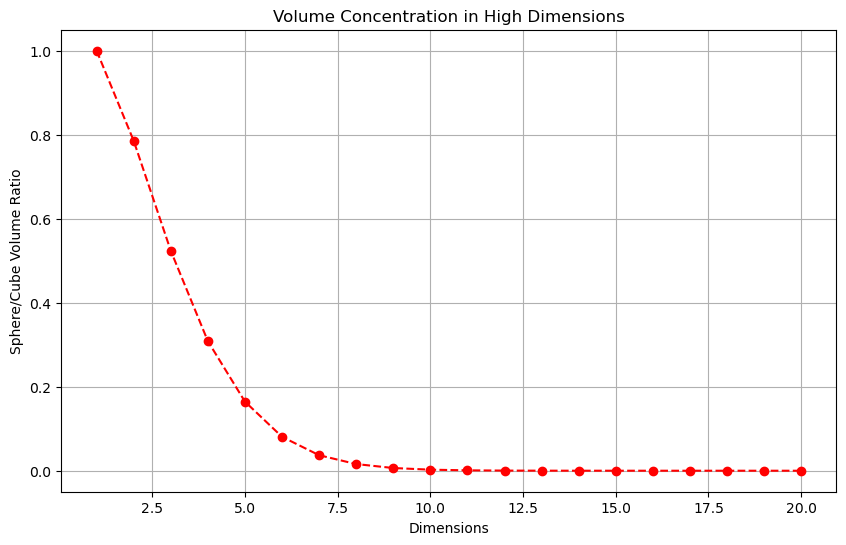

In [5]:
dims = np.arange(1, 21)  # Dimensions from 1 to 20
ratios = []

for d in dims:
    cube_volume = (2**d)  # Volume of hypercube with side length 2
    sphere_volume = (np.pi**(d/2)) / gamma(d/2 + 1)  # Volume of unit hypersphere
    ratios.append(sphere_volume / cube_volume)

plt.figure(figsize=(10, 6))
plt.plot(dims, ratios, marker='o', linestyle='--', color='red')
plt.xlabel('Dimensions')
plt.ylabel('Sphere/Cube Volume Ratio')
plt.title('Volume Concentration in High Dimensions')
plt.grid()
plt.show()

In low dimensions, the hypersphere occupies a significant portion of the hypercube. However, as dimensionality increases, the sphere's volume shrinks relative to the cube's, meaning most of the cube's volume lies outside the sphere. This demonstrates that in high-dimensional spaces, data tends to concentrate near the boundaries rather than the center, further complicating tasks like clustering, nearest neighbors, and density estimation.

## Understanding Neighborhood Behavior in High-Dimensional Hyperspheres
##### This interactive visualization explores how locality and neighbor relationships change within high-dimensional spaces, using a hypersphere as the domain:

#### Concept Overview
##### Hypersphere Sampling: Random points are generated uniformly within a hypercube, and then filtered to retain only those that lie inside a unit-radius n-dimensional hypersphere.

##### Distance Distributions: Two key distance metrics are computed:
* ##### Point-to-Edge Distance: Distance from each point to the surface (boundary) of the hypersphere.
* ##### Point-to-Point Distance: Pairwise distances between all points inside the hypersphere.
##### Neighbor Counting: For each point, the number of neighbors closer than the distance to the hypersphere boundary is calculated. This provides a measure of how many other points are perceived as "closer than the edge."

##### Interactive Parameters:
The user can control:
 * m: Number of sampled points
 * n: Number of dimensions
 * r: Radius of the hypersphere
 * seed: For reproducible randomness


#### Key Insights
As dimensionality increases:
* Most points concentrate near the boundary of the hypersphere.
* The average distance between points becomes comparable to the distance from any point to the edge.
* The number of "closer neighbors" decreases, highlighting the difficulty of defining local neighborhoods in high dimensions.
* This concept visualizes a core idea of the curse of dimensionality:

In high-dimensional spaces, even simple geometric intuitions like “closeness” or “neighbor” begin to break down, leading to challenges for clustering, classification, and other distance-based algorithms.

In [6]:
def plot_neighbours(m, n, r=1.0, seed=42):
    rng = np.random.default_rng(seed)
    points = rng.uniform(-r, r, m * n).reshape(m, n)
    
    
    moduli = np.linalg.norm(points, axis=1)
    hsphere_mask = moduli < r  
    hsphere_points = points[hsphere_mask]
    hsphere_moduli = moduli[hsphere_mask]
    
    total_points = points.shape[0]
    points_within = hsphere_points.shape[0]
    print(f"Points within hypersphere: {points_within}/{total_points} "
          f"({points_within/total_points*100:.2f}%)")
    

    point_separations = cdist(hsphere_points, hsphere_points, metric='euclidean')
    diag_indices = np.diag_indices(point_separations.shape[0])
    _mask = np.zeros(point_separations.shape)
    _mask[diag_indices] = 1.0
    point_separations = np.ma.masked_where(_mask, point_separations)
    

    edge_separations = r - hsphere_moduli

    nearby_points = (point_separations < edge_separations[:, None]).astype(int)
    nearby_points_count = nearby_points.sum(axis=1)
    

    fig, ax = plt.subplots(figsize=(12, 5))
    ax.hist(edge_separations, bins=50, color='blue', density=True, 
            alpha=0.7, label='Point-edge distance')
    ax.hist(point_separations.compressed(), bins=50, color='red', density=True, 
            alpha=0.7, label='Point-point distance')
    ax.axvspan(edge_separations.min(), edge_separations.max(), color='blue', alpha=0.15)
    ax.axvspan(point_separations.min(), point_separations.max(), color='red', alpha=0.1)
    ax.set_xlabel('Distance')
    ax.set_ylabel('Density')
    ax.set_title(f'Distance Distributions in a {n}D Hypersphere (m={m})')
    ax.legend() 
    ax.grid(True)
    plt.show()

    bins = np.arange(0, 12)
    fig, ax = plt.subplots(figsize=(12, 5))
    hist_counts, bin_edges, _ = ax.hist(nearby_points_count, bins=bins, 
                                        color='green', align='left', 
                                        edgecolor='k', alpha=0.6)
    ax.set_yscale('log')
    ax.set_xlim(-1, bin_edges[-1] + 1)
    ax.set_xticks(np.arange(bin_edges[0], bin_edges[-1] + 1))
    ax.set_xlabel('Number of Neighbours within Edge Distance')
    ax.set_ylabel('Frequency (log scale)')
    ax.set_title('Histogram: Number of Neighbours Before Reaching the Edge')
    
    # Annotate each bar with the count
    for count, x in zip(hist_counts, bin_edges[:-1]):
        if count > 0:
            ax.annotate(f"{int(count)}", (x, count), xycoords="data",
                        xytext=(0, 5), textcoords="offset points",
                        ha='center', va='bottom')
    ax.grid(True)
    plt.show()

# Create interactive widgets to update the parameters
interact(plot_neighbours, 
         m=(100, 1000, 100), 
         n=(1, 10, 1), 
         r=(0.5, 2.0, 0.1), 
         seed=(1, 100, 1));


interactive(children=(IntSlider(value=500, description='m', max=1000, min=100, step=100), IntSlider(value=5, d…

### Distance Concentration in High Dimensions
##### This plot demonstrates the distance concentration phenomenon, a core aspect of the curse of dimensionality, by analyzing how distances behave in high-dimensional spaces.

#### Concept Overview
* ##### Data Generation: For each dimension d from 1 to 49, the code generates 100 random points uniformly distributed in a d-dimensional unit hypercube.

* ##### Distance Calculation: Pairwise Euclidean distances between all points are computed for each dimension.

* ##### Coefficient of Variation (CV): The coefficient of variation is calculated for each dimension using:


​
#### As dimensionality increases, the CV decreases, meaning:
* Pairwise distances between points become more similar.
* The distinction between "near" and "far" points becomes less meaningful.
* This leads to the failure of many algorithms that rely on distance metrics (e.g., k-NN, clustering, kernel methods).
* This effect underscores a fundamental challenge in high-dimensional data analysis, distance loses its discriminatory power.


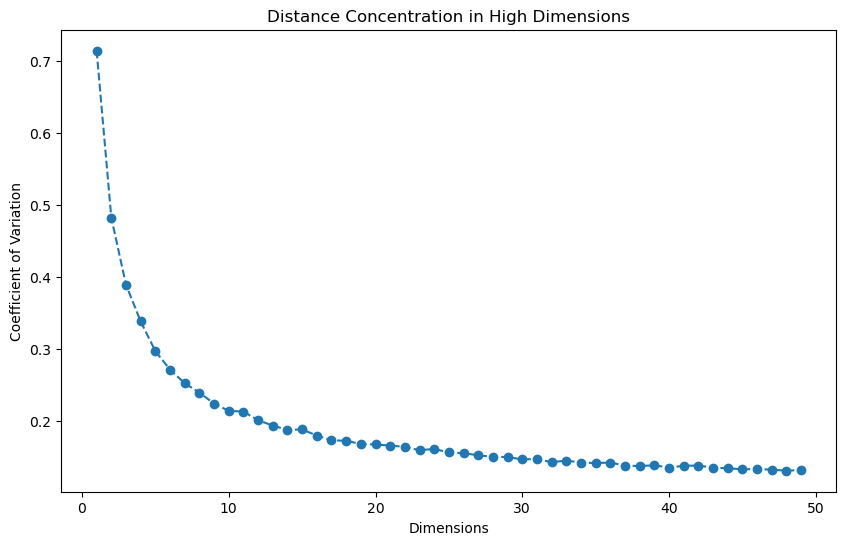

In [7]:
dims = np.arange(1, 50)
n_points = 100
cvs = []

for d in dims:
    data = np.random.rand(n_points, d)
    distances = np.linalg.norm(data[:, np.newaxis] - data, axis=2)
    cv = np.std(distances) / np.mean(distances)
    cvs.append(cv)

plt.figure(figsize=(10, 6))
plt.plot(dims, cvs, marker='o', linestyle='--')
plt.xlabel('Dimensions')
plt.ylabel('Coefficient of Variation')
plt.title('Distance Concentration in High Dimensions')
plt.show()

### Curse of Dimensionality: Pairwise Distance Distributions
##### Random Sampling: For each dimension D in the list (ranging from 1 to 2048), the code generates N=1000 random points uniformly distributed in a D-dimensional unit hypercube 

##### Distance Calculation: The pairwise Euclidean distance between all points is computed for each dimension. These distances are used to observe how data behaves in high-dimensional spaces.

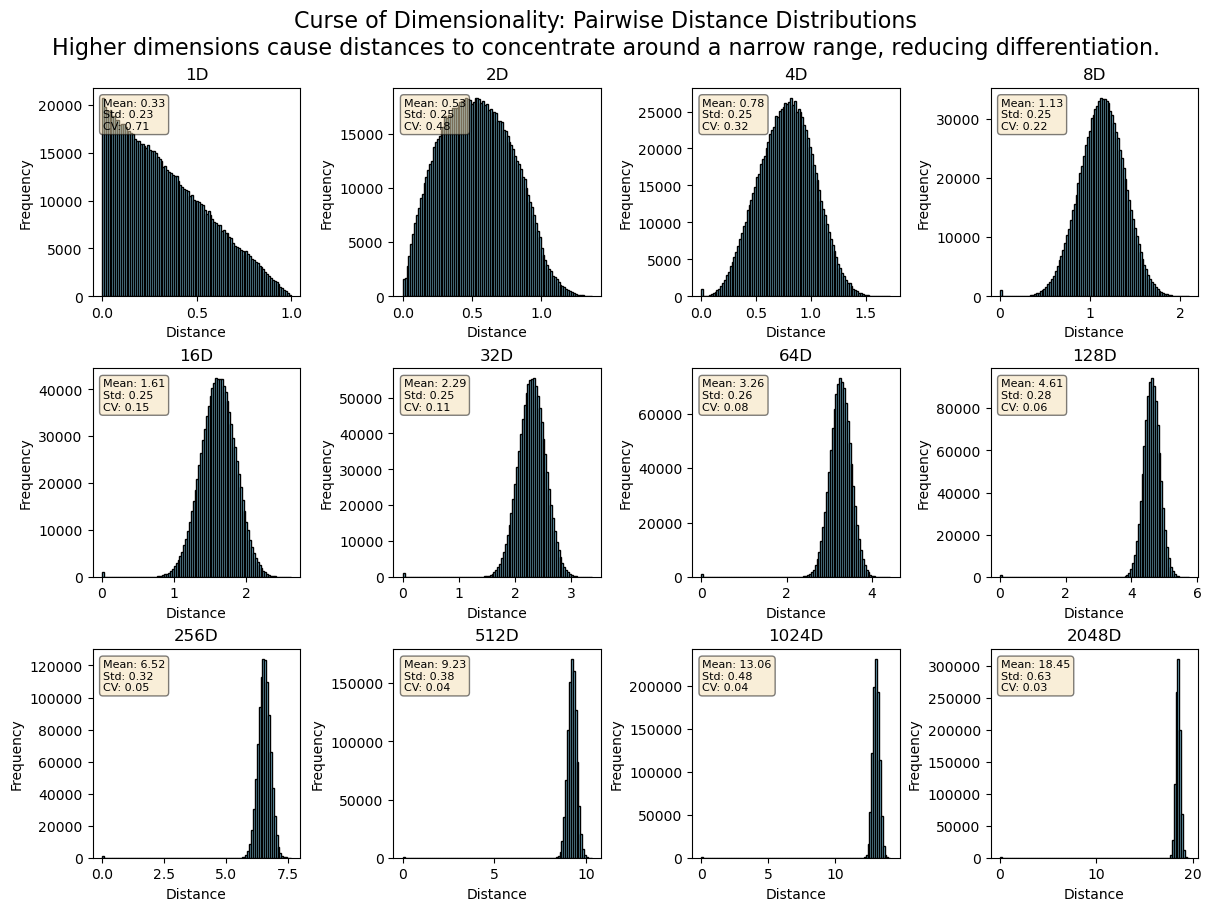

In [8]:
N = 1000
Ds = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
rows, cols = 3, 4

fig, axes = plt.subplots(nrows=rows, ncols=cols, 
                         constrained_layout=True, figsize=(cols*3, rows*3))
axes = axes.flatten()  # Flatten the axes array for easy iteration


for i, D in enumerate(Ds):
    x = np.random.rand(N, D)
    
    dist = np.sqrt(np.sum((x[None, :, :] - x[:, None, :])**2, axis=-1))
    
    dist_flat = dist.ravel()
    mean_dist = np.mean(dist_flat)
    std_dist = np.std(dist_flat)
    cv = std_dist / mean_dist  
    

    axes[i].hist(dist_flat, bins=100, color='skyblue', edgecolor='black')
    axes[i].set_xlabel("Distance")
    axes[i].set_ylabel("Frequency")
    axes[i].set_title(f'{D}D')
    

    stats_text = f"Mean: {mean_dist:.2f}\nStd: {std_dist:.2f}\nCV: {cv:.2f}"
    axes[i].text(0.05, 0.95, stats_text, transform=axes[i].transAxes, 
                 verticalalignment='top', fontsize=8,
                 bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5))

plt.suptitle(
    "Curse of Dimensionality: Pairwise Distance Distributions\n"
    "Higher dimensions cause distances to concentrate around a narrow range, reducing differentiation.",
    fontsize=16
)

plt.show()

As the number of dimensions increases, the distances between points become increasingly uniform, and the contrast between “near” and “far” disappears. This undermines the effectiveness of many traditional machine learning algorithms in high-dimensional spaces.



### Principal Component Analysis (PCA) on Increasing Dimensional Data
#### This code demonstrates how Principal Component Analysis (PCA) captures variance from high-dimensional data as I increase the number of input features.

* Dataset: The code uses the Digits dataset from Scikit-learn, where each sample is represented by 64 pixel-based features (i.e., a flattened 8×8 image).

* Dimensional Sweep: The code incrementally increases the number of input features from 2 to 20, each time applying PCA to reduce the data to 2 principal components.

* Variance Analysis: For each subset of features, PCA calculates how much of the total variance in the data is captured by the first two principal components (PC1 and PC2). This percentage is stored and plotted.

#### Visualizations: 
* A grid of 2D PCA scatter plots shows how data is projected in lower dimensions.

* A line plot shows the relationship between the number of input features and the percentage of variance captured by the top 2 components.



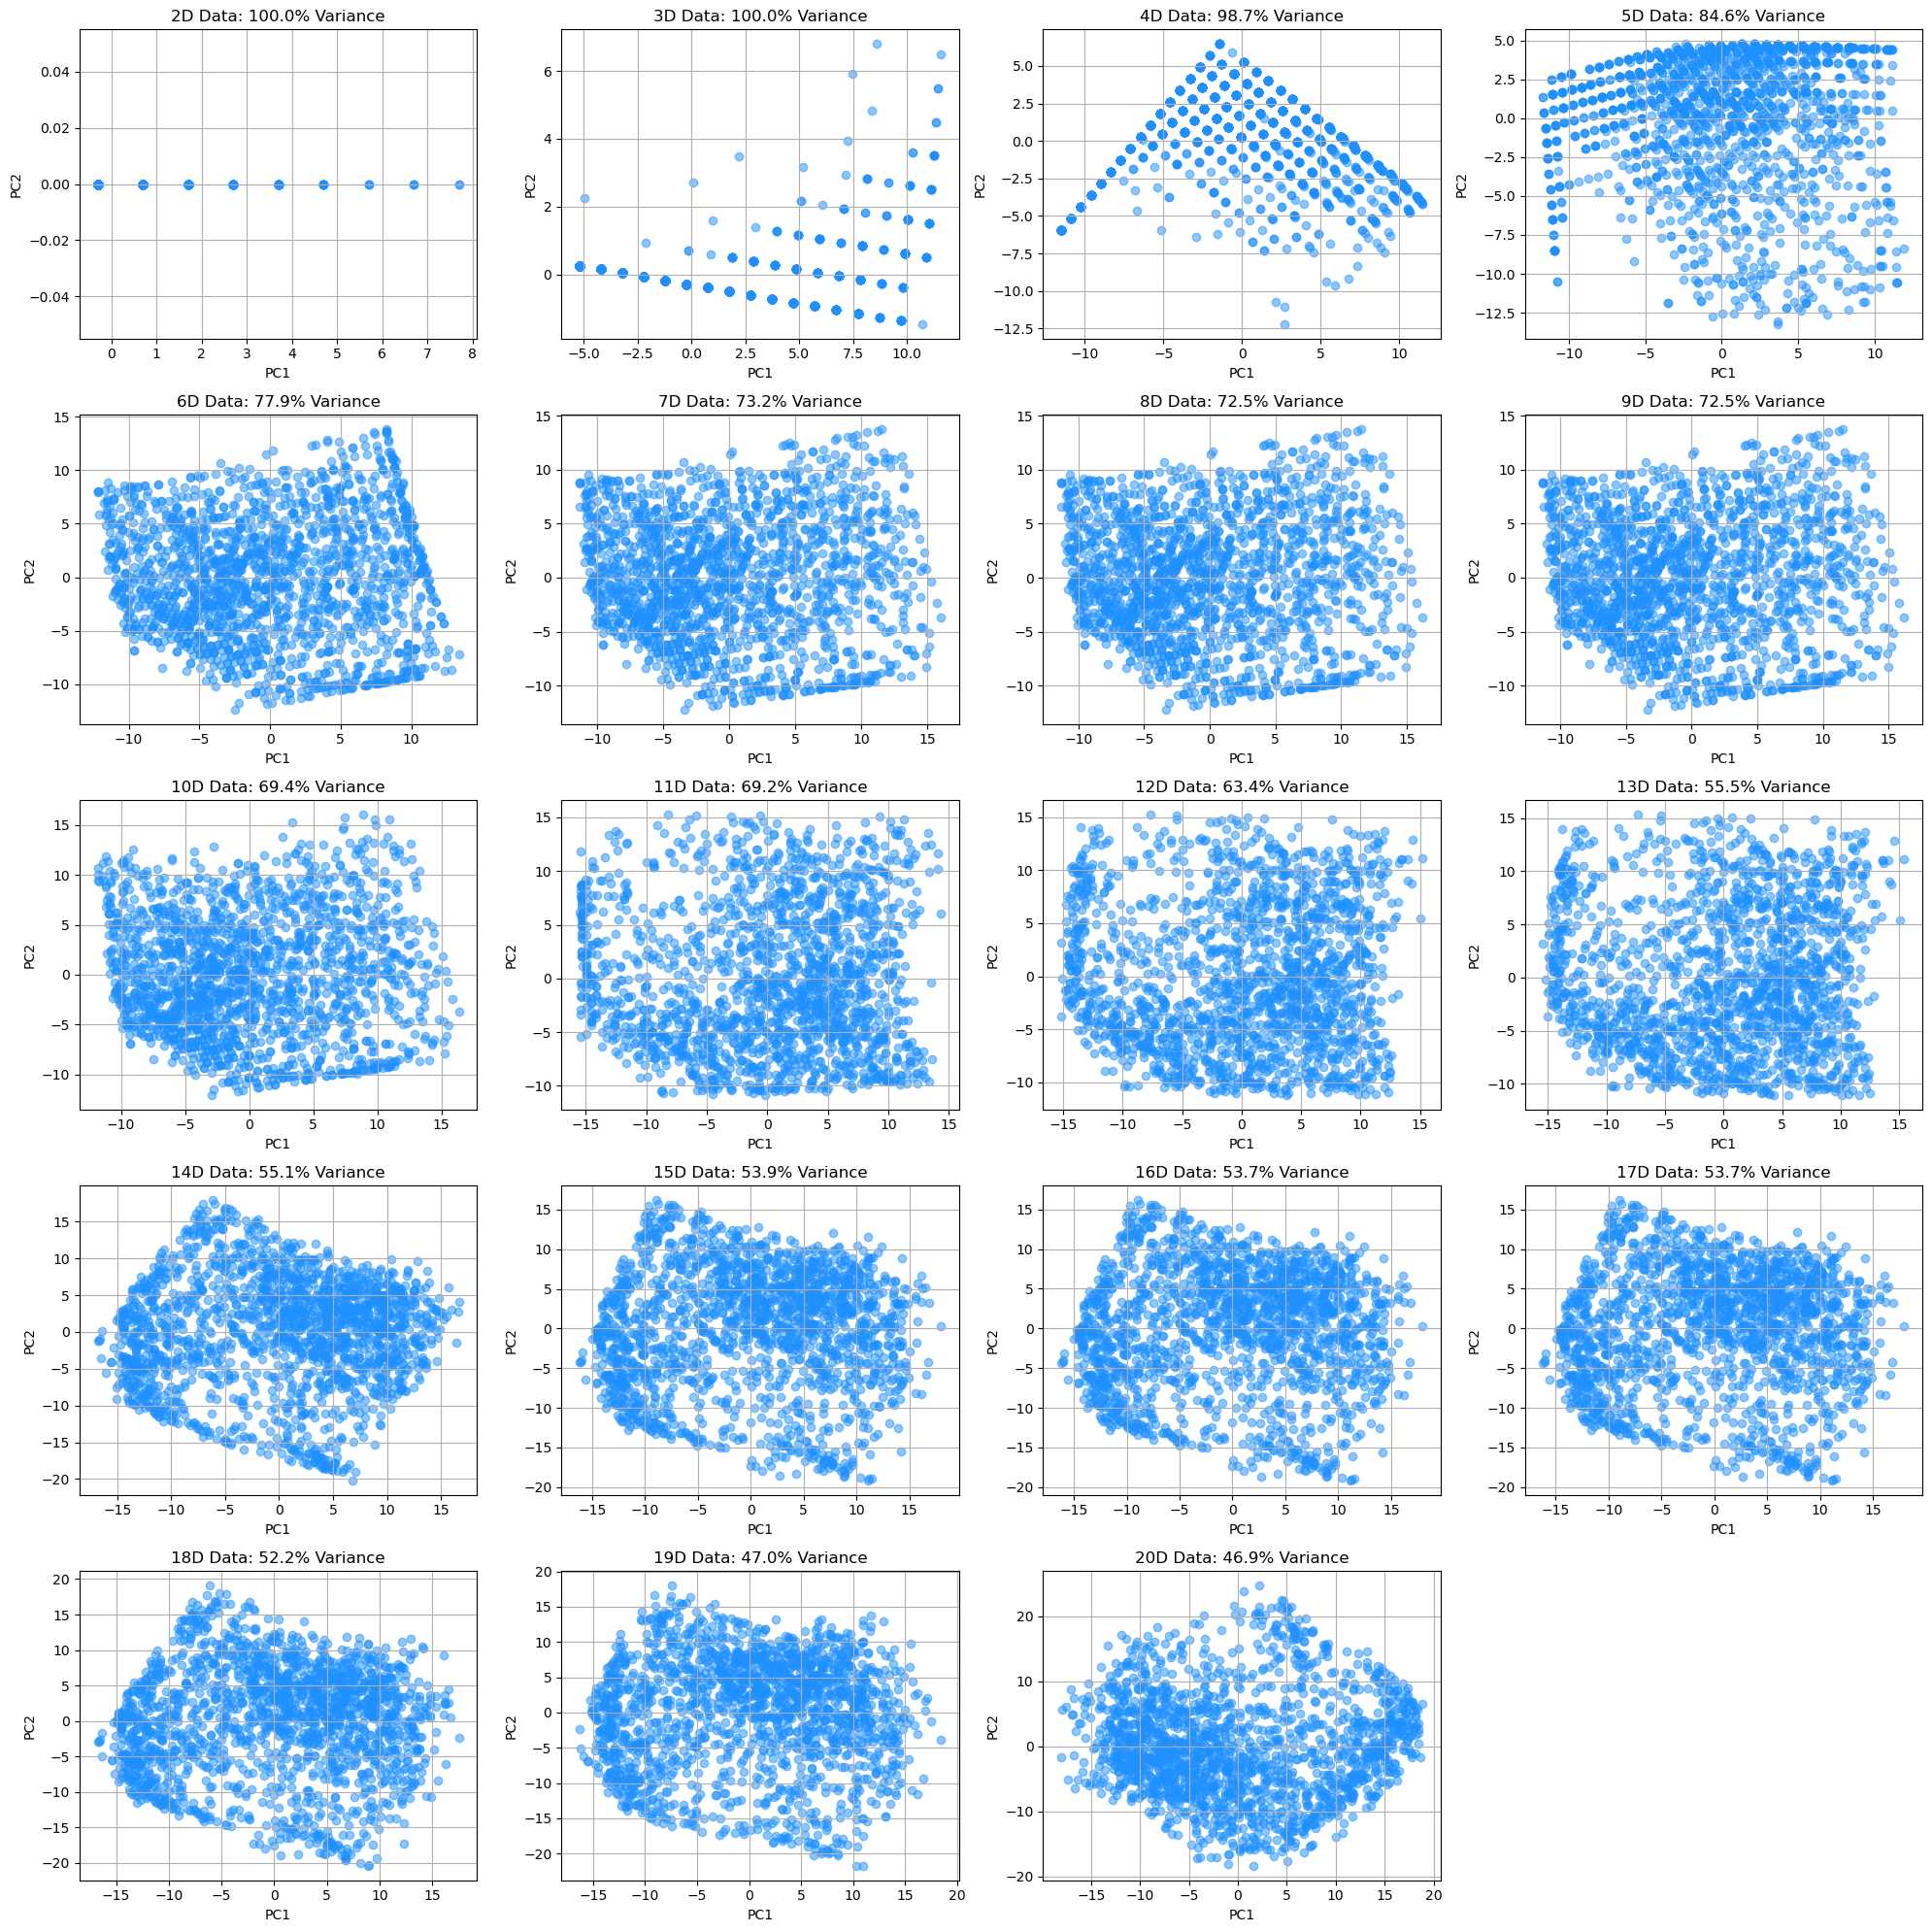

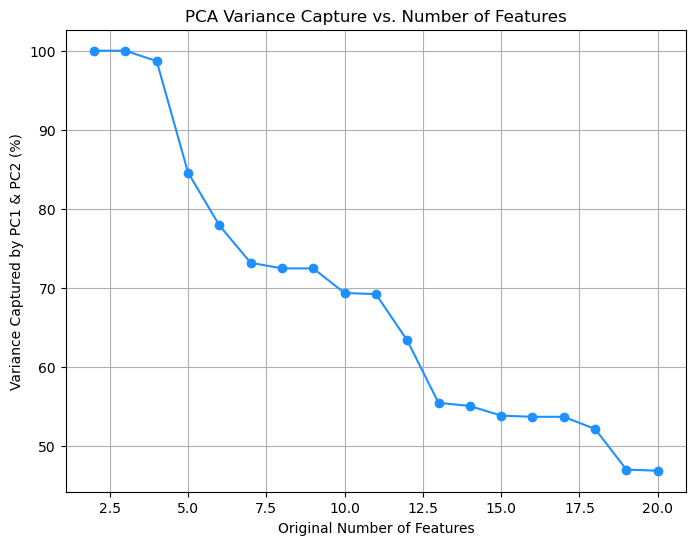

In [9]:
# Using the digits dataset from scikit-learn (each sample has 64 features)
digits = load_digits()
data_full = digits.data
n_points = data_full.shape[0]

dimensions_range = range(2, 21)  
explained_variances = []        


n_plots = len(dimensions_range)
cols = 4
rows = n_plots // cols + (n_plots % cols != 0)
fig, axes = plt.subplots(rows, cols, figsize=(20, 4 * rows))
axes = axes.flatten()  # Flatten the grid to iterate easily

for idx, d in enumerate(dimensions_range):
    data_d = data_full[:, :d]
    
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data_d)
    
    total_variance = pca.explained_variance_ratio_.sum() * 100
    explained_variances.append(total_variance)
    
    ax = axes[idx]
    ax.scatter(data_2d[:, 0], data_2d[:, 1], alpha=0.5, color='dodgerblue')
    ax.set_title(f'{d}D Data: {total_variance:.1f}% Variance')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.grid(True)

for i in range(len(dimensions_range), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(list(dimensions_range), explained_variances, marker='o', linestyle='-', color='dodgerblue')
plt.xlabel('Original Number of Features')
plt.ylabel('Variance Captured by PC1 & PC2 (%)')
plt.title('PCA Variance Capture vs. Number of Features')
plt.grid(True)
plt.show()


* #### The first image shows a grid of 2D PCA scatter plots where each subplot represents the projection of data using the first d features (from 2D to 20D). Initially, with fewer features, PCA captures nearly all the variance, resulting in clear and compact projections. However, as dimensionality increases, the variance becomes distributed across more components, and the 2D PCA projections begin to flatten and lose structure, making it harder to differentiate between points. 
* #### The second image quantifies this trend by plotting the percentage of variance captured by PC1 and PC2 against the number of input features. The curve shows a steep decline, indicating that low-dimensional PCA projections become less representative as the feature space grows. 
* #### Together, these visualizations highlight a core issue of high-dimensional data: meaningful patterns become harder to visualize and interpret without using more principal components, reinforcing the effects of the curse of dimensionality.

### Final Summary: Understanding the Curse of Dimensionality
##### The curse of dimensionality refers to the set of challenges that arise when analyzing and visualizing high-dimensional data. Through a series of experiments and visualizations, we observed several key effects:

* Distance Concentration: As dimensions increase, pairwise distances between points become increasingly similar. This reduces the effectiveness of distance-based algorithms like k-NN and clustering, as the notion of “closeness” becomes meaningless.

* Volume Paradox: The volume of a unit hypersphere becomes negligible compared to the surrounding hypercube as dimensions grow. This means most of the space lies near the boundaries, leading to sparse and unintuitive geometries.

* Breakdown of Locality: In high-dimensional hyperspheres, points have fewer nearby neighbors than expected. Most points are close to the boundary rather than each other, complicating neighborhood-based learning.

* Visualization Limits & PCA: When projecting high-dimensional data using PCA, the variance captured by just two principal components decreases sharply with more features. This makes 2D visualizations less informative, and dimensionality reduction becomes necessary but not always sufficient.


##### The curse of dimensionality is not just a theoretical concept, it manifests in practical issues like reduced algorithm performance, misleading visualizations, and sparse data distributions. Understanding its implications is crucial when working with high-dimensional datasets, and it reinforces the need for feature selection, dimensionality reduction, and careful algorithm design in modern data science and machine learning.



### About the Author

Hello! I am *Manav Patel*, a graduate student in Petroleum Engineering at The University of Texas at Austin and a Graduate Research Assistant specializing in reservoir geomechanics and hydraulic fracturing workflows. He holds a B.Tech in Petroleum Engineering. His experience spans over offshore production and flow assurance operations.


This notebook serves as my submission for the Subsurface Machine Learning (PGE383) course project.

Feel free to connect with me on LinkedIn or mail me for further discussions or collaborations!

* **LinkedIn Profile:** [Manav Patel](https://www.linkedin.com/in/manav-patel-30/)
* **Email ID:** Manav.Patel-1@utexas.edu


#### About the Supervising Professor

Michael Pyrcz is a professor in the [Cockrell School of Engineering](https://cockrell.utexas.edu/faculty-directory/alphabetical/p), and the [Jackson School of Geosciences](https://www.jsg.utexas.edu/researcher/michael_pyrcz/), at [The University of Texas at Austin](https://www.utexas.edu/), where he researches and teaches subsurface, spatial data analytics, geostatistics, and machine learning. Michael is also,

* the principal investigator of the [Energy Analytics](https://fri.cns.utexas.edu/energy-analytics) freshmen research initiative and a core faculty in the Machine Learn Laboratory in the College of Natural Sciences, The University of Texas at Austin

* an associate editor for [Computers and Geosciences](https://www.sciencedirect.com/journal/computers-and-geosciences/about/editorial-board), and a board member for [Mathematical Geosciences](https://link.springer.com/journal/11004/editorial-board), the International Association for Mathematical Geosciences. 

Michael has written over 70 [peer-reviewed publications](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en), a [Python package](https://pypi.org/project/geostatspy/) for spatial data analytics, co-authored a textbook on spatial data analytics, [Geostatistical Reservoir Modeling](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) and author of two recently released e-books, [Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) and [Applied Machine Learning in Python: a Hands-on Guide with Code](https://geostatsguy.github.io/MachineLearningDemos_Book/intro.html).

All of Michael’s university lectures are available on his [YouTube Channel](https://www.youtube.com/@GeostatsGuyLectures) with links to 100s of Python interactive dashboards and well-documented workflows in over 40 repositories on his [GitHub account](https://github.com/GeostatsGuy), to support any interested students and working professionals with evergreen content. To find out more about Michael’s work and shared educational resources visit his [Website](www.michaelpyrcz.com).

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PI is Professor John Foster)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)